<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/entrega_final_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CIENCIA DE DATOS/PROYECTO_FINAL.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   scheduled_flight_leg_block_off_date      19934 non-null  object 
 1   scheduled_flight_leg_block_off_time      19934 non-null  object 
 2   scheduled_flight_leg_block_off_date_utc  19934 non-null  object 
 3   scheduled_flight_leg_block_off_time_utc  19934 non-null  object 
 4   marketing_airline_code                   19934 non-null  object 
 5   operating_flight_num                     19934 non-null  int64  
 6   origin_leg_iata_airport_code             19934 non-null  object 
 7   destination_leg_iata_airport_code        19934 non-null  object 
 8   flight_leg_registration_code             19880 non-null  object 
 9   actual_flight_leg_fleet_name             19880 non-null  object 
 10  actual_flight_leg_fleet_name_code        19880

In [ ]:
data.isnull().sum()

,0
scheduled_flight_leg_block_off_date,0
scheduled_flight_leg_block_off_time,0
scheduled_flight_leg_block_off_date_utc,0
scheduled_flight_leg_block_off_time_utc,0
marketing_airline_code,0
operating_flight_num,0
origin_leg_iata_airport_code,0
destination_leg_iata_airport_code,0
flight_leg_registration_code,54
actual_flight_leg_fleet_name,54


In [ ]:
data['scheduled_flight_leg_block_off_date'] = pd.to_datetime(data['scheduled_flight_leg_block_off_date'])

min_date = data['scheduled_flight_leg_block_off_date'].min()
max_date = data['scheduled_flight_leg_block_off_date'].max()

print(f"Fecha mínima: {min_date}")
print(f"Fecha máxima: {max_date}")

Fecha mínima: 2024-08-01 00:00:00
Fecha máxima: 2024-12-12 00:00:00


In [ ]:
# Eliminación de los valores nulos que si restringen el análisis y NO representan gran proporción dentro del dataset
data.dropna(subset=['flight_leg_registration_code','actual_flight_leg_fleet_name','actual_flight_leg_fleet_name_code'], inplace=True)

In [ ]:
# prompt: Sacar el promedio de las columnas total_pax_qty, total_capacity_leg_qty, fo_pct, peso_pasajeros_avg_last_30_days, peso_pasajeros_sum_last_30_days, cant_bags_sum_last_30_days, peso_bags_sum_last_30_days, cant_bags_avg_last_30_days, peso_bags_avg_last_30_days, cant_pasajeros_totales_avg_last_30_days
# cant_pasajeros_totales_sum_last_30_days, payload_max_avg_last_30_days, payload_max_sum_last_30_days según actual_flight_leg_fleet_name, origin_leg_iata_airport_code y destination_leg_iata_airport_code y redondea los resultados a 2 decimales y con esto crear una tupla

import pandas as pd
import numpy as np

def calculate_averages(data):
    # Columns to calculate averages for
    columns_to_average = ['total_pax_qty', 'total_capacity_leg_qty', 'fo_pct',
                          'peso_pasajeros_avg_last_30_days', 'peso_pasajeros_sum_last_30_days',
                          'cant_bags_sum_last_30_days', 'peso_bags_sum_last_30_days',
                          'cant_bags_avg_last_30_days', 'peso_bags_avg_last_30_days',
                          'cant_pasajeros_totales_avg_last_30_days',
                          'cant_pasajeros_totales_sum_last_30_days',
                          'payload_max_avg_last_30_days', 'payload_max_sum_last_30_days']

    # Grouping and calculating averages
    averages = data.groupby(['actual_flight_leg_fleet_name', 'origin_leg_iata_airport_code', 'destination_leg_iata_airport_code'])[columns_to_average].mean().round(2)

    # Convert the result to a list of tuples
    result_tuples = []
    for index, row in averages.iterrows():
        result_tuples.append(tuple(index) + tuple(row))
    return result_tuples

# Example usage (assuming 'data' DataFrame is already loaded as in your previous code)
result = calculate_averages(data)
print(result[:5]) # Print the first 5 tuples for demonstration

[('A319', 'SCL', 'GYE', 114.51, 131.59, 0.87, 8662.2, 2452045.44, 28343.15, 461556.35, 97.43, 1589.74, 112.93, 31979.1, 10699.64, 3570884.81), ('A319', 'SCL', 'LIM', 121.07, 136.88, 0.88, 14010.35, 50246534.6, 398013.57, 6459613.21, 109.69, 1781.07, 180.35, 647059.07, 30066.71, 112082371.1), ('A320', 'MIA', 'BOG', 151.41, 173.42, 0.87, 12311.52, 7788812.37, 98458.26, 1543745.4, 155.44, 2436.76, 151.05, 95554.97, 14839.91, 10640441.08), ('A320', 'MIA', 'MIA', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan), ('A320', 'MIA', 'UIO', 152.91, 174.0, 0.88, 12231.33, 4539226.87, 80452.7, 1376426.5, 214.55, 3662.42, 151.74, 56297.69, 15536.17, 6490111.88)]


In [ ]:
# prompt: Remplaza los valores nulos en las columnas total_pax_qty, total_capacity_leg_qty, fo_pct, peso_pasajeros_avg_last_30_days, peso_pasajeros_sum_last_30_days, cant_bags_sum_last_30_days, peso_bags_sum_last_30_days, cant_bags_avg_last_30_days, peso_bags_avg_last_30_days, cant_pasajeros_totales_avg_last_30_days
# cant_pasajeros_totales_sum_last_30_days, payload_max_avg_last_30_days, payload_max_sum_last_30_days según su relación con los datos en result según actual_flight_leg_fleet_name, origin_leg_iata_airport_code y destination_leg_iata_airport_code

def fill_missing_values(data, result):
    # Create a dictionary to map the averages based on the groupby columns
    avg_dict = {}
    for fleet, origin, destination, *avg_values in result:
        key = (fleet, origin, destination)
        avg_dict[key] = avg_values

    # Columns to fill
    columns_to_fill = ['total_pax_qty', 'total_capacity_leg_qty', 'fo_pct',
                       'peso_pasajeros_avg_last_30_days', 'peso_pasajeros_sum_last_30_days',
                       'cant_bags_sum_last_30_days', 'peso_bags_sum_last_30_days',
                       'cant_bags_avg_last_30_days', 'peso_bags_avg_last_30_days',
                       'cant_pasajeros_totales_avg_last_30_days',
                       'cant_pasajeros_totales_sum_last_30_days',
                       'payload_max_avg_last_30_days', 'payload_max_sum_last_30_days']

    for index, row in data.iterrows():
        key = (row['actual_flight_leg_fleet_name'], row['origin_leg_iata_airport_code'], row['destination_leg_iata_airport_code'])
        if key in avg_dict:
            for i, col in enumerate(columns_to_fill):
                if pd.isnull(row[col]):
                    data.loc[index, col] = avg_dict[key][i]
    return data

# Example usage:
data = fill_missing_values(data, result)
data.isnull().sum()

,0
scheduled_flight_leg_block_off_date,0
scheduled_flight_leg_block_off_time,0
scheduled_flight_leg_block_off_date_utc,0
scheduled_flight_leg_block_off_time_utc,0
marketing_airline_code,0
operating_flight_num,0
origin_leg_iata_airport_code,0
destination_leg_iata_airport_code,0
flight_leg_registration_code,0
actual_flight_leg_fleet_name,0


In [ ]:
data.dropna(subset=['total_pax_qty','total_capacity_leg_qty','fo_pct','peso_pasajeros_avg_last_30_days','peso_pasajeros_sum_last_30_days','cant_bags_sum_last_30_days','peso_bags_sum_last_30_days',
                    'cant_bags_avg_last_30_days','peso_bags_avg_last_30_days','cant_pasajeros_totales_avg_last_30_days','cant_pasajeros_totales_sum_last_30_days','payload_max_avg_last_30_days',
                    'payload_max_sum_last_30_days'], inplace=True)

In [ ]:
# prompt: Mostrar los valores únicos de actual_flight_leg_fleet_name

print(data['actual_flight_leg_fleet_name'].unique())

['A321' 'A320' 'B789' 'B767' 'B787' 'B777' 'A32N' 'A319']


In [ ]:
# prompt: Eliminar las filas con valores de la columna actual_flight_leg_fleet_name que sean 'A321' 'A320' 'A32N' 'A319'

# List of fleet names to remove
fleet_names_to_remove = ['A321', 'A320', 'A32N', 'A319']

# Filter out rows where 'actual_flight_leg_fleet_name' is in the list
data = data[~data['actual_flight_leg_fleet_name'].isin(fleet_names_to_remove)]

# Print unique fleet names to verify the removal
print(data['actual_flight_leg_fleet_name'].unique())

['B789' 'B767' 'B787' 'B777']


In [ ]:
data.head()

,scheduled_flight_leg_block_off_date,scheduled_flight_leg_block_off_time,scheduled_flight_leg_block_off_date_utc,scheduled_flight_leg_block_off_time_utc,marketing_airline_code,operating_flight_num,origin_leg_iata_airport_code,destination_leg_iata_airport_code,flight_leg_registration_code,actual_flight_leg_fleet_name,...,cant_pasajeros_totales_sum_last_30_days,payload_max_avg_last_30_days,payload_max_sum_last_30_days,PESO_1_BAG,PESO_1_PAX,CANT_BAGS_POR_PAX,CANT_BAGS_TOTALES,PESO_BAGS_POR_PAX_BOOKEADOS,PESO_PAX_BOOKEADOS,POS_USADAS_POR_EQUIPAJE
11,2024-12-12,17:00:00,2024-12-12,20:00:00,LA,714,SCL,GRU,CCBGA,B789,...,536692.0,20068.67,84206287.0,16.150597,78.913636,0.744703,101.711499,1643.0,10778.0,4.0
17,2024-12-12,18:00:00,2024-12-12,21:00:00,LA,2696,SCL,LIM,CCBGG,B789,...,454429.0,16973.63,70480649.0,16.349133,78.252807,0.628037,74.403485,1216.0,9271.0,3.0
20,2024-12-12,09:40:00,2024-12-12,14:40:00,LA,8195,MIA,GRU,CCBMA,B789,...,431263.0,43556.97,76933311.0,19.101133,80.604061,1.388471,349.825170,6682.0,20308.0,10.0
24,2024-12-12,00:10:00,2024-12-12,05:10:00,LA,2693,MIA,LIM,CCCWY,B767,...,269131.0,31318.67,52689576.0,18.687802,80.751136,1.407259,240.416114,4493.0,13796.0,0.0
28,2024-12-12,00:40:00,2024-12-12,05:40:00,LA,2699,MIA,LIM,CCCXH,B767,...,269131.0,31318.67,52689576.0,18.687802,80.751136,1.407259,240.416114,4493.0,13796.0,0.0


In [ ]:
data['Kg_disp_carga'] = data['payload_max_avg_last_30_days'] - data['peso_bags_avg_last_30_days'] - data['peso_pasajeros_avg_last_30_days']

In [ ]:
data['pos_disp_carga'] = data['POS_DISP_TOTALES'] - round(data['cant_bags_avg_last_30_days']/35)

In [ ]:
print(data['actual_flight_leg_fleet_name'].unique())

['B789' 'B767' 'B787' 'B777']


In [ ]:
# prompt: Remplazar en la columa origin_leg_iata_airport_code SCL por 1, MIA por 2 y MAD por 3

# Replace values in 'origin_leg_iata_airport_code' column
data['origin_leg_iata_airport_code'] = data['origin_leg_iata_airport_code'].replace({'SCL': 1, 'MIA': 2, 'MAD': 3})
data['destination_leg_iata_airport_code'] = data['destination_leg_iata_airport_code'].replace({'GRU': 1,'LIM': 2,'MAD': 3,'SCL': 4,'JFK': 5,'IPC': 6,'LAX': 7,'MIA': 8,'AKL': 9,'MCO': 10,'MEX': 11,'SYD': 12,
                                                                                               'FOR': 13,'PUJ': 14,'MEL': 15,'CUN': 16,'BOG': 17,'ANF': 18,'EZE': 19,'PUQ': 20})
data['actual_flight_leg_fleet_name'] = data['actual_flight_leg_fleet_name'].replace({'B789': 789,'B767': 767,'B787': 787,'B777': 777})
print(data['origin_leg_iata_airport_code'].unique())

[1 2 3]


<ipython-input-24-8cb20c977775>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['origin_leg_iata_airport_code'] = data['origin_leg_iata_airport_code'].replace({'SCL': 1, 'MIA': 2, 'MAD': 3})
<ipython-input-24-8cb20c977775>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['destination_leg_iata_airport_code'] = data['destination_leg_iata_airport_code'].replace({'GRU': 1,'LIM': 2,'MAD': 3,'SCL': 4,'JFK': 5,'IPC': 6,'LAX': 7,'MIA': 8,'AKL': 9,'MCO': 10,'MEX': 11,'SYD': 12,
<ipython-input-24-8cb20c977775>:7: FutureWarning: D

In [ ]:
data = data.drop(['scheduled_flight_leg_block_off_date','scheduled_flight_leg_block_off_time','scheduled_flight_leg_block_off_date_utc','scheduled_flight_leg_block_off_time_utc',
                  'marketing_airline_code','operating_flight_num','flight_leg_registration_code','actual_flight_leg_fleet_name_code','FLIGHT_KEY_PLANNING','FLIGHT_KEY_PAX'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 11 to 19932
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   origin_leg_iata_airport_code             3531 non-null   int64  
 1   destination_leg_iata_airport_code        3531 non-null   int64  
 2   actual_flight_leg_fleet_name             3531 non-null   int64  
 3   POS_DISP_TOTALES                         3531 non-null   int64  
 4   total_pax_qty                            3531 non-null   float64
 5   total_capacity_leg_qty                   3531 non-null   float64
 6   fo_pct                                   3531 non-null   float64
 7   peso_pasajeros_avg_last_30_days          3531 non-null   float64
 8   peso_pasajeros_sum_last_30_days          3531 non-null   float64
 9   cant_bags_sum_last_30_days               3531 non-null   float64
 10  peso_bags_sum_last_30_days               3531 non-n

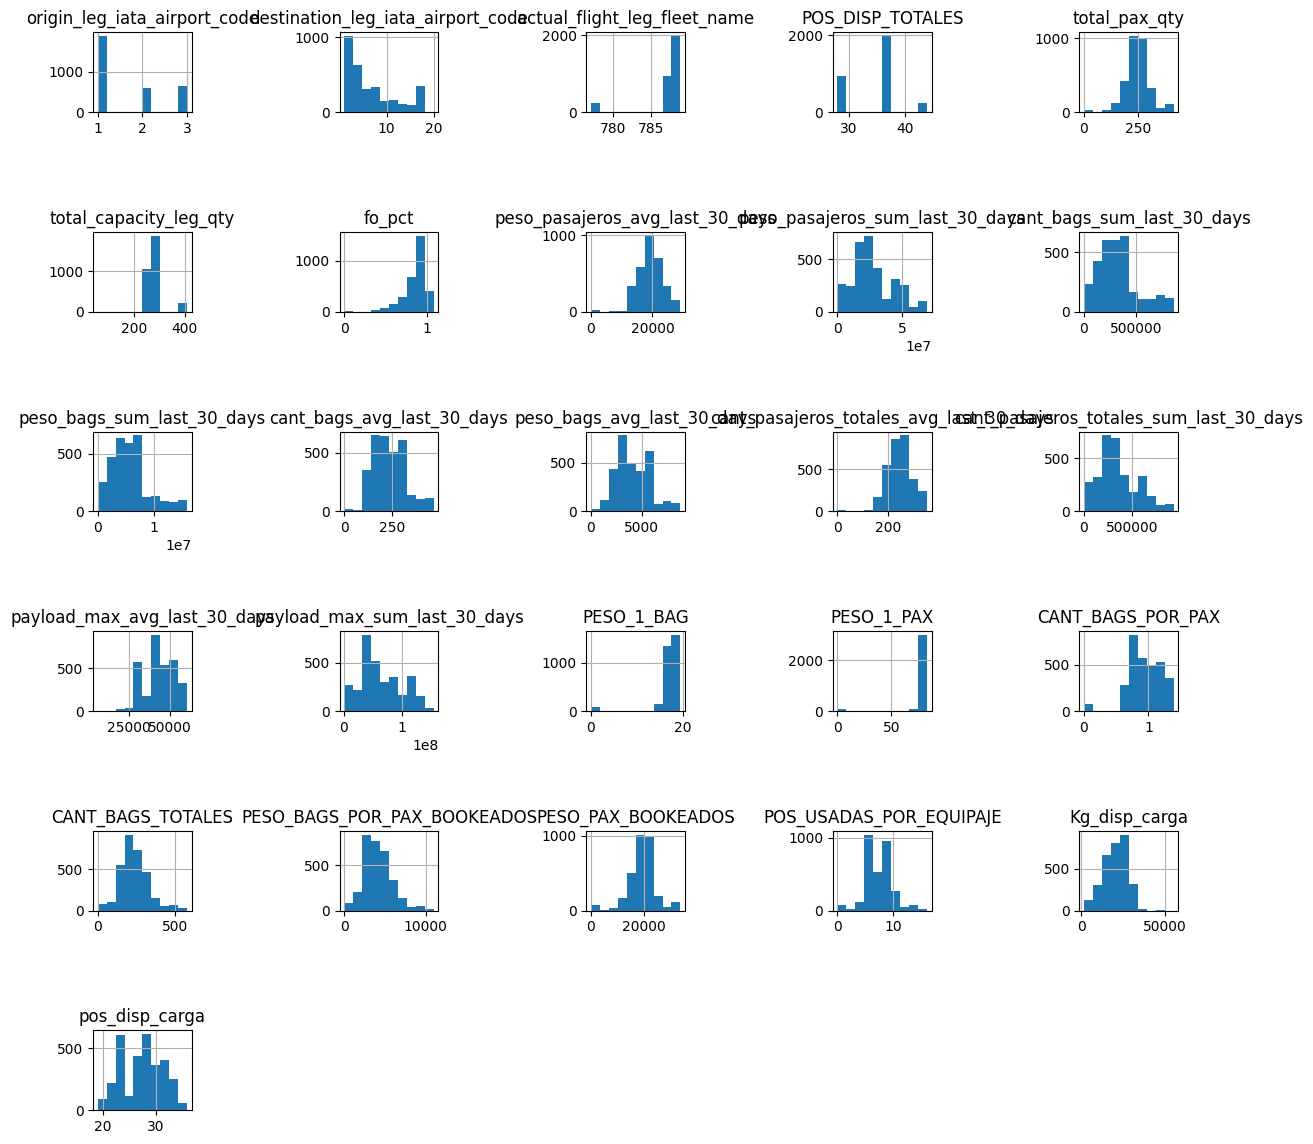

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the figsize to provide more space
data.hist(figsize=(14, 14))

# Add more spacing between subplots
plt.subplots_adjust(hspace=1.5, wspace=1.5)

plt.show()

In [ ]:
# prompt: Elimina las filas de la columna pos_disp_carga que tenga datos < que 0

# Drop rows where 'pos_disp_carga' is less than 0
data = data[data['pos_disp_carga'] >= 0]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3148 entries, 11 to 19932
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   origin_leg_iata_airport_code             3148 non-null   int64  
 1   destination_leg_iata_airport_code        3148 non-null   int64  
 2   actual_flight_leg_fleet_name             3148 non-null   int64  
 3   POS_DISP_TOTALES                         3148 non-null   int64  
 4   total_pax_qty                            3148 non-null   float64
 5   total_capacity_leg_qty                   3148 non-null   float64
 6   fo_pct                                   3148 non-null   float64
 7   peso_pasajeros_avg_last_30_days          3148 non-null   float64
 8   peso_pasajeros_sum_last_30_days          3148 non-null   float64
 9   cant_bags_sum_last_30_days               3148 non-null   float64
 10  peso_bags_sum_last_30_days               3148 non-n

In [ ]:
data_clean_kg_carga = data

data_clean_pos_carga = data

data_clean_kg_carga

,origin_leg_iata_airport_code,destination_leg_iata_airport_code,actual_flight_leg_fleet_name,POS_DISP_TOTALES,total_pax_qty,total_capacity_leg_qty,fo_pct,peso_pasajeros_avg_last_30_days,peso_pasajeros_sum_last_30_days,cant_bags_sum_last_30_days,...,payload_max_sum_last_30_days,PESO_1_BAG,PESO_1_PAX,CANT_BAGS_POR_PAX,CANT_BAGS_TOTALES,PESO_BAGS_POR_PAX_BOOKEADOS,PESO_PAX_BOOKEADOS,POS_USADAS_POR_EQUIPAJE,Kg_disp_carga,pos_disp_carga
11,1,1,789,36,243.13,302.75,0.800000,10794.84,42352317.0,399676.0,...,84206287.0,16.150597,78.913636,0.744703,101.711499,1643.0,10778.0,4.0,7651.70,33.0
17,1,2,789,36,251.89,303.67,0.830000,9271.23,35560345.0,285398.0,...,70480649.0,16.349133,78.252807,0.628037,74.403485,1216.0,9271.0,3.0,6502.26,34.0
20,2,1,789,36,256.53,298.73,0.860000,20310.12,34761549.0,598796.0,...,76933311.0,19.101133,80.604061,1.388471,349.825170,6682.0,20308.0,10.0,16586.40,26.0
38,1,3,789,36,280.97,300.00,0.940000,13410.19,10189044.0,110597.0,...,21206947.0,17.741367,80.124594,0.869713,145.476823,2581.0,13402.0,5.0,9901.16,32.0
41,2,4,789,36,250.11,300.04,0.830000,14490.09,18642119.0,296452.0,...,45109517.0,19.290641,80.752852,1.284154,230.672515,4450.0,14506.0,7.0,13764.70,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19893,1,5,787,28,221.00,243.00,0.909465,17241.94,14346276.0,149155.0,...,38036950.0,16.068311,78.073697,0.811715,179.388935,2882.0,17254.0,6.0,23680.09,23.0
19906,3,4,789,36,286.00,300.00,0.953333,21989.79,30927144.0,404168.0,...,50339372.0,18.338481,80.404174,1.050753,300.515404,5511.0,22996.0,9.0,6450.16,28.0
19915,1,1,789,36,273.00,300.00,0.910000,15381.06,64539268.0,731356.0,...,132121180.0,15.115315,73.942710,0.837915,228.750897,3458.0,20186.0,7.0,15012.81,31.0
19928,2,1,789,36,283.00,296.00,0.956081,25087.90,45637268.0,752677.0,...,111592331.0,18.546392,78.020293,1.286757,364.152267,6754.0,22080.0,11.0,26823.44,24.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['origin_leg_iata_airport_code','destination_leg_iata_airport_code','actual_flight_leg_fleet_name','POS_DISP_TOTALES','total_pax_qty','total_capacity_leg_qty','fo_pct',
                        'peso_pasajeros_avg_last_30_days','peso_pasajeros_sum_last_30_days','cant_bags_sum_last_30_days','peso_bags_sum_last_30_days','cant_bags_avg_last_30_days','peso_bags_avg_last_30_days',
                        'cant_pasajeros_totales_avg_last_30_days','cant_pasajeros_totales_sum_last_30_days','payload_max_avg_last_30_days','payload_max_sum_last_30_days','PESO_1_BAG','PESO_1_PAX',
                        'CANT_BAGS_POR_PAX','CANT_BAGS_TOTALES','PESO_BAGS_POR_PAX_BOOKEADOS','PESO_PAX_BOOKEADOS','POS_USADAS_POR_EQUIPAJE','Kg_disp_carga','pos_disp_carga']
for column in columns_to_normalize:
    scaler = MinMaxScaler()
    data_clean_kg_carga[column] = scaler.fit_transform(data_clean_kg_carga[[column]])
    data_clean_pos_carga[column] = scaler.fit_transform(data_clean_pos_carga[[column]])

In [ ]:
from sklearn.model_selection import train_test_split

X1 = data_clean_kg_carga.drop('Kg_disp_carga', axis=1)
y1 = data_clean_kg_carga['Kg_disp_carga']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((2518, 25), (630, 25), (2518,), (630,))

In [ ]:
from sklearn.model_selection import train_test_split

X2 = data_clean_pos_carga.drop('pos_disp_carga', axis=1)
y2 = data_clean_pos_carga['pos_disp_carga']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((2518, 25), (630, 25), (2518,), (630,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [ ]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
svm = SVR()
rf = RandomForestRegressor()
xgbreg = XGBRegressor()

In [ ]:
lr.fit(X_train1, y_train1)
knn.fit(X_train1, y_train1)
dt.fit(X_train1, y_train1)
svm.fit(X_train1, y_train1)
xgbreg.fit(X_train1, y_train1)
rf.fit(X_train1, y_train1)

vr = VotingRegressor(estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('svm', svm), ('rf', rf)])
vr.fit(X_train1, y_train1)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor()), ('svm', SVR()),
                            ('rf', RandomForestRegressor())])

In [ ]:
lr.fit(X_train2, y_train2)
knn.fit(X_train2, y_train2)
dt.fit(X_train2, y_train2)
svm.fit(X_train2, y_train2)
xgbreg.fit(X_train2, y_train2)
rf.fit(X_train2, y_train2)

vr = VotingRegressor(estimators=[('lr', lr), ('knn', knn), ('dt', dt), ('svm', svm), ('rf', rf)])
vr.fit(X_train2, y_train2)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor()), ('svm', SVR()),
                            ('rf', RandomForestRegressor())])

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

modelos = [lr, knn, dt, svm, rf, vr, xgbreg]
nombres_modelos = ['Linear Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'Ensemble', 'XGBoost']

metricas_modelos= pd.DataFrame(columns=['RMSE', 'MAE', 'R2'], index=nombres_modelos)

for model, name in zip(modelos, nombres_modelos):
    predictions = model.predict(X_test1)
    # Aplicar la transformación inversa a las predicciones para observar las metricas en la escala original
    # esto es necesario ya que se normalizó la variable objetivo
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    real_values = scaler.inverse_transform(y_test1.values.reshape(-1, 1))
    rmse = root_mean_squared_error(real_values, predictions)
    mae = mean_absolute_error(real_values, predictions)
    r2 = r2_score(real_values, predictions)
    rmse = round(rmse, 3)
    mae = round(mae, 3)
    r2 = round(r2, 3)
    metricas_modelos_Kg_Disp.loc[name, :] = [rmse, mae, r2]


metricas_modelos_Kg_Disp

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- pos_disp_carga
Feature names seen at fit time, yet now missing:
- Kg_disp_carga
